In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('C:/Users/puent/OneDrive/Escritorio/Javi Bootcamp/Data-Science-TBB-main/SCRIPTS/Proyectos/Machine Learning/src/utils')
from  funciones import guardar_csv
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


print("Packages installed")
#settings
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 1200)
pd.set_option('display.width', 1200)

Packages installed


In [4]:
df_limpio = pd.read_csv('C:/Users/puent/OneDrive/Escritorio/Javi Bootcamp/Data-Science-TBB-main/SCRIPTS/Proyectos/Machine Learning/src/data/processed/dfLimpio.csv')
df_limpio

,tourney_id,surface,draw_size,tourney_level,match_num,winner_id,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_hand,loser_ht,loser_ioc,loser_age,best_of,round,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_year,tourney_month,tourney_day
0,0,2,64,2021,237,126207,1,188.0,57,23.4,126952,1,180.0,37,23.6,3,6,53.0,1228.0,71.0,996.0,0,7,24
1,0,2,64,2021,238,105526,1,193.0,27,31.2,106329,0,183.0,8,27.1,3,6,48.0,1410.0,95.0,829.0,0,7,24
2,0,2,64,2021,239,111576,1,178.0,30,23.9,104797,1,188.0,64,34.8,3,6,160.0,471.0,197.0,354.0,0,7,24
3,0,2,64,2021,240,105357,1,183.0,1,32.0,207518,1,185.0,34,19.3,3,6,44.0,1476.0,61.0,1106.0,0,7,24
4,0,2,64,2021,241,207830,1,183.0,16,20.7,105311,1,185.0,48,32.3,3,6,145.0,525.0,137.0,570.0,0,7,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7848,357,2,4,2023,4,208029,1,185.0,17,19.7,111576,1,178.0,31,25.4,3,7,9.0,3046.0,506.0,70.0,1,2,3
7849,358,2,4,2023,2,111576,1,178.0,30,26.0,125842,1,191.0,54,28.3,3,7,156.0,397.0,779.0,29.0,1,9,16
7850,359,0,4,2023,2,200031,1,185.0,38,27.0,105877,1,185.0,19,31.7,3,7,452.0,97.0,185.0,326.0,1,9,15
7851,360,0,4,2023,1,105633,1,183.0,20,32.9,202378,1,178.0,0,24.1,3,7,463.0,93.0,828.0,24.0,1,9,16


## K-means Clustering:

In [5]:


# Seleccionar las características relevantes para el clustering (excluyendo tourney_id y winner_id)
X = df_limpio.drop(columns=['tourney_id', 'winner_id'])

# Normalizar los datos si es necesario
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Definir el número de clusters
num_clusters = 5

# Crear un modelo K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Ajustar el modelo a los datos
kmeans.fit(X)

# Obtener las etiquetas de cluster asignadas a cada muestra
cluster_labels = kmeans.labels_

# Agregar las etiquetas de cluster al DataFrame original
df_limpio['Cluster'] = cluster_labels

# Guardar el DataFrame con las etiquetas de cluster
ruta_destino = "./data/processed/"
guardar_csv(df_limpio, 'datos_con_clusters.csv', ruta_destino)

# Analizar los resultados
cluster_centers = kmeans.cluster_centers_
cluster_df = pd.DataFrame(cluster_centers, columns=X.columns)
print("Centros de los clusters:")
print(cluster_df)

# Contar el número de muestras en cada cluster
cluster_counts = df_limpio['Cluster'].value_counts()
print("\nNúmero de muestras en cada cluster:")
print(cluster_counts)


C:\Users\puent\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Error al guardar el DataFrame en './data/processed/': Cannot save file into a non-existent directory: 'data\processed'
Centros de los clusters:
    surface  draw_size  tourney_level   match_num  winner_hand   winner_ht  winner_ioc  winner_age       loser_id  loser_hand    loser_ht  loser_ioc  loser_age   best_of     round  winner_rank  winner_rank_points  loser_rank  loser_rank_points  tourney_year  tourney_month  tourney_day
0  1.164456  63.830239    2022.053050  244.371353     0.877984  187.244032   27.533156   26.739523  143863.992042    0.572944  185.668435  35.506631  24.768700  3.413793  4.612732    63.819629         1839.360743   88.734748         812.546419      1.297082       5.448276    17.493369
1  1.379585  63.929825    2022.035088  243.084530     0.867624  187.588517   30.950558   26.921691  111593.728868    0.858054  188.023923  37.135566  26.660606  3.392344  4.521531    63.665072         2015.191388   91.614035        1064.555024      1.381180       5.655502    16.18181

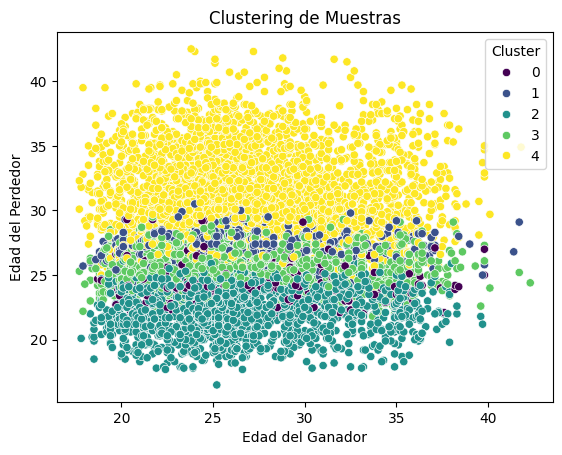

In [6]:
# Graficar los clusters utilizando dos características (por ejemplo, winner_age y loser_age)
sns.scatterplot(data=df_limpio, x='winner_age', y='loser_age', hue='Cluster', palette='viridis')
plt.title('Clustering de Muestras')
plt.xlabel('Edad del Ganador')
plt.ylabel('Edad del Perdedor')
plt.show()

## PCA (Análisis de Componentes Principales):

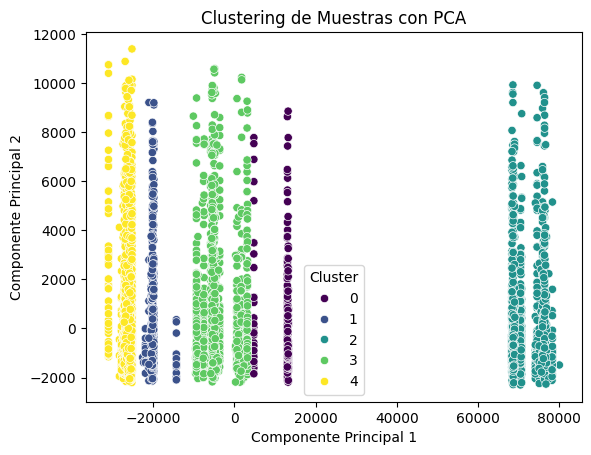

In [7]:


# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Añadir el cluster asignado a cada muestra como una columna en el DataFrame original
df_limpio['Cluster'] = kmeans.labels_

# Graficar los clusters en el espacio reducido de PCA
sns.scatterplot(data=df_limpio, x=X_pca[:, 0], y=X_pca[:, 1], hue='Cluster', palette='viridis')
plt.title('Clustering de Muestras con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()
